In [307]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [308]:
data = pd.read_csv('shopping_trends.csv')

In [309]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [310]:
sutunSecimi = data[["Age", "Customer ID","Purchase Amount (USD)","Review Rating"]]
corrMatrisi = sutunSecimi.corr()
corrMatrisi

,Age,Customer ID,Purchase Amount (USD),Review Rating
Age,1.000000,-0.004079,-0.010424,-0.021949
Customer ID,-0.004079,1.000000,0.011048,0.001343
Purchase Amount (USD),-0.010424,0.011048,1.000000,0.030776
Review Rating,-0.021949,0.001343,0.030776,1.000000


In [311]:
data.describe

<bound method NDFrame.describe of       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2          

In [312]:
data.shape

(3900, 19)

In [313]:
data.dtypes

Customer ID                   int64
Age                           int64
Gender                       object
Item Purchased               object
Category                     object
Purchase Amount (USD)         int64
Location                     object
Size                         object
Color                        object
Season                       object
Review Rating               float64
Subscription Status          object
Payment Method               object
Shipping Type                object
Discount Applied             object
Promo Code Used              object
Previous Purchases            int64
Preferred Payment Method     object
Frequency of Purchases       object
dtype: object

In [314]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [315]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [316]:
feature = 'Purchase Amount (USD)'
data_feature = data[feature].dropna()
mean = data_feature.mean()
std = data_feature.std()
mean, std


(59.76435897435898, 23.685392250875307)

In [317]:
sorted_data = np.sort(data_feature)
pdf_values = norm.pdf(sorted_data, loc=mean, scale=std)
cdf_values = norm.cdf(sorted_data, loc=mean, scale=std)
pdf_values[:5], cdf_values[:5]


(array([0.00411517, 0.00411517, 0.00411517, 0.00411517, 0.00411517]),
 array([0.04659007, 0.04659007, 0.04659007, 0.04659007, 0.04659007]))

In [318]:
value_range = (50, 100)
prob_in_range = norm.cdf(value_range[1], loc=mean, scale=std) - norm.cdf(value_range[0], loc=mean, scale=std)
prob_in_range

0.615239943422957

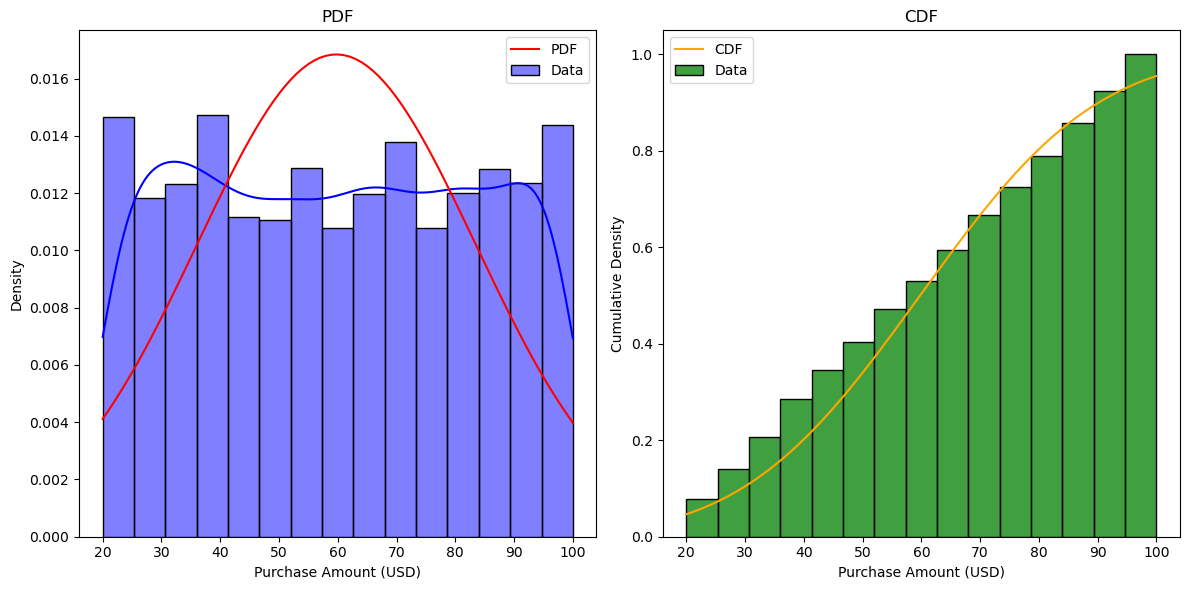

In [319]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data_feature, kde=True, stat="density", binwidth=5.3, color='blue', label="Data")
plt.plot(sorted_data, pdf_values, color='red', label="PDF")
plt.title("PDF")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(data_feature, cumulative=True, stat="density", binwidth=5.3, color='green', label="Data")
plt.plot(sorted_data, cdf_values, color='orange', label="CDF")
plt.title("CDF")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Cumulative Density")
plt.legend()

plt.tight_layout()
plt.show()


# Yukarıdaki PDF ve CDF grafikleri, **Purchase Amount (USD)** veri setinin dağılımını gösteriyor. PDF grafiği, verilerin yoğunlaştığı aralıkları ve seyrek olduğu bölgeleri belirler. Eğri yüksekse, o aralıkta yoğunluk fazladır. CDF grafiği ise toplam olasılığı gösterir; eğri ne kadar dikse, veriler o kadar hızlı artar. Bu grafikler, verinin hangi aralıkta yoğunlaştığını ve hangi aralıklarda daha seyrek olduğunu görselleştirir.

#  Scatter plot, yaş ve harcama miktarı arasındaki ilişkiyi gösterir. Verilerin doğrusal bir ilişki olup olmadığını, yoğunlaştığı bölgeleri ve uç değerleri gözlemleyebiliriz.


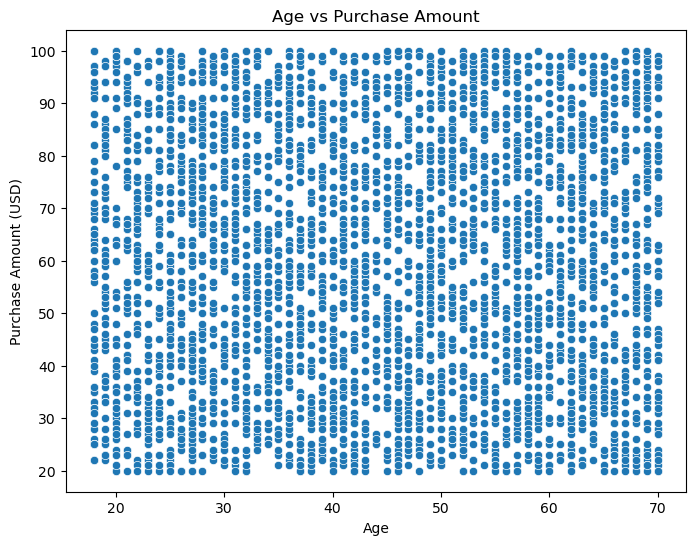

In [322]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['Purchase Amount (USD)'])
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.show()



#  Pie chart, cinsiyet dağılımını yüzde olarak gösterir. Erkek ve kadın oranlarını hızlıca görmek, veri setindeki cinsiyet dengesini anlamamıza yardımcı olur.


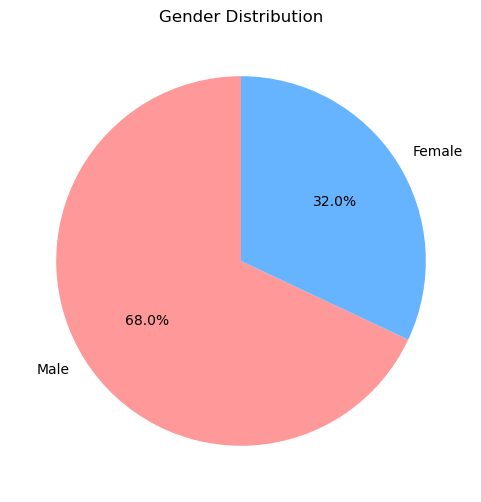

In [324]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()



# Box plot, cinsiyet ve harcama miktarının dağılımını karşılaştırır. Verinin medyanını, çeyrekler arası aralığını ve uç değerlerini görselleştirir.


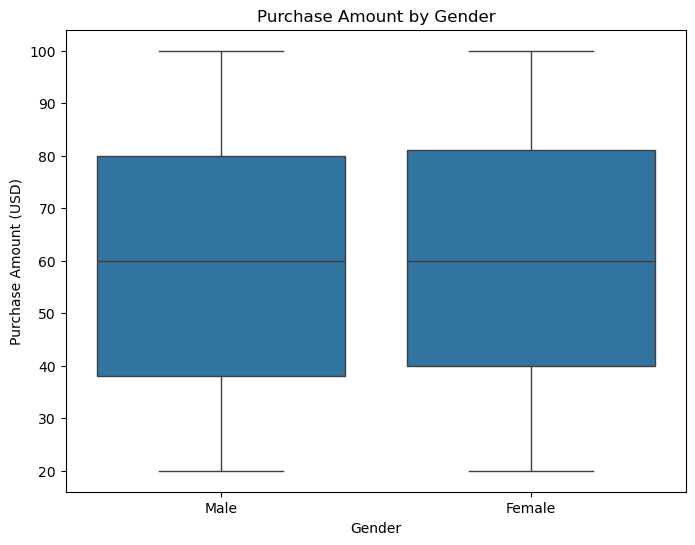

In [326]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Gender'], y=data['Purchase Amount (USD)'])
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

#  Bar plot, yaş gruplarına göre ortalama harcama miktarlarını karşılaştırır. Farklı yaş gruplarının harcama alışkanlıklarını görsel olarak analiz ederiz.


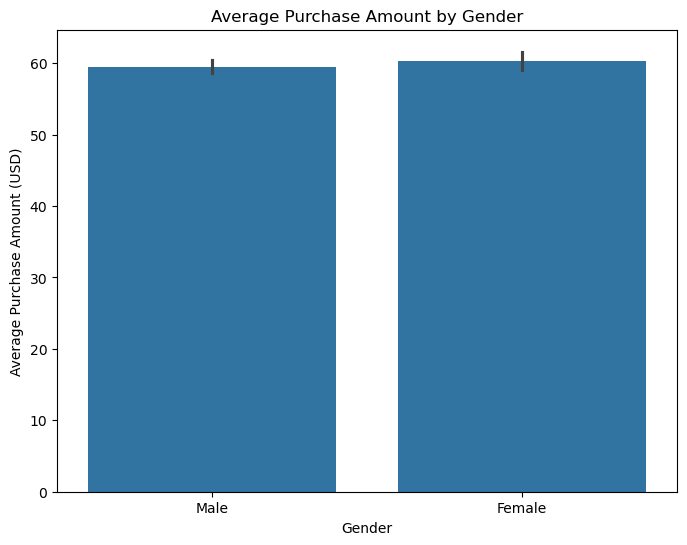

In [328]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Gender'], y=data['Purchase Amount (USD)'])
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# Histogram, harcama miktarının dağılımını gösterir. Verinin hangi aralıklarda yoğunlaştığını ve hangi aralıklarda daha seyrek olduğunu anlamamıza olanak tanır.


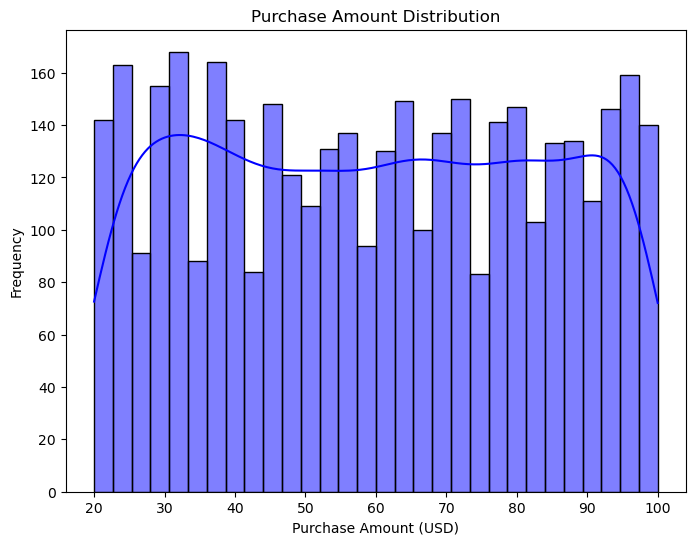

In [330]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='blue')
plt.title('Purchase Amount Distribution')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

#  Violin plot, yaş ve harcama miktarı arasındaki yoğunluk dağılımını gösterir. Box plot ile benzer şekilde dağılımı ama daha ayrıntılı olarak görselleştirir.


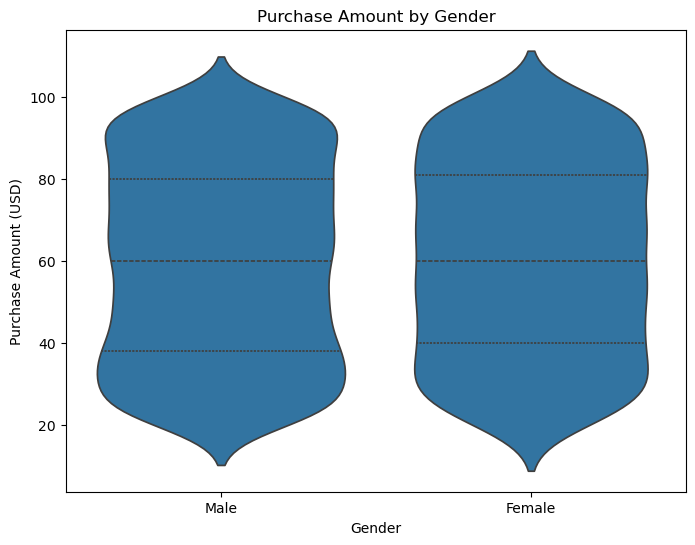

In [332]:
plt.figure(figsize=(8, 6))
sns.violinplot(x=data['Gender'], y=data['Purchase Amount (USD)'], inner="quart")
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()

# KDE plot, harcama miktarının yoğunluk fonksiyonunu gösterir. Verinin pürüzsüz bir şekilde dağılımını ve hangi bölgelerde yoğunlaştığını anlamamıza yardımcı olur.

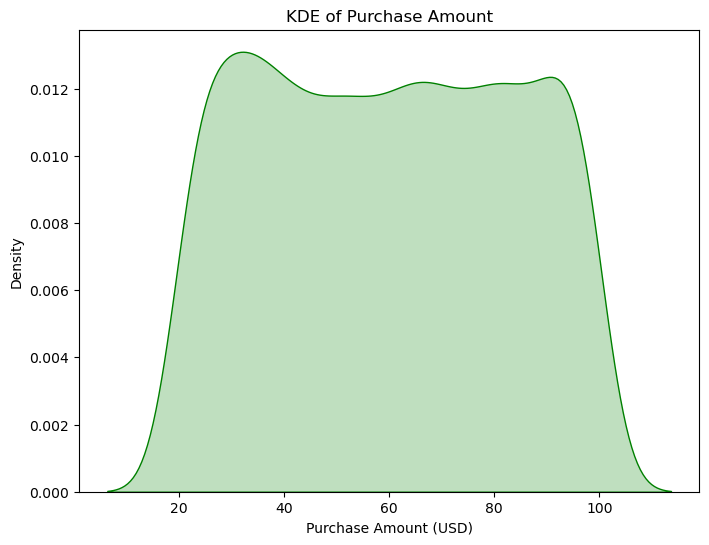

In [334]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['Purchase Amount (USD)'], fill=True, color='green')
plt.title('KDE of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.show()

# Heatmap, yaş, harcama ve ürün kategorisi arasındaki korelasyonu görselleştirir. Değişkenler arasındaki ilişkilerin gücünü ve yönünü hızlıca gözlemlememizi sağlar.


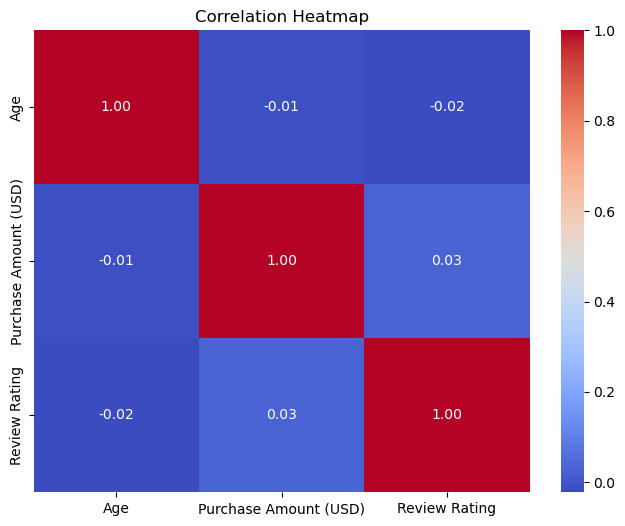

In [336]:
correlation_matrix = data[['Age', 'Purchase Amount (USD)', 'Review Rating']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()